# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Annisa Fitri Zuhailyya
- Email: annisafitri497@gmail.com
- Id Dicoding: nisalyyaa

## Menentukan Pertanyaan Bisnis (Hipotesis)

- Bagaimana performa persewaan bike sharing pada hari kerja dan hari libur?
- Bagaimana performa persewaan bie sharing tiap bulannya pada tahun 2011?
- Apakah musim mempengaruhi minat dalam menyewa bike sharing?

## Menyiapkan semua library yang dibutuhkan


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [6]:
import pandas as pd

day_df = pd.read_csv("https://raw.githubusercontent.com/nisalyya/Bike_sharing_dataset/main/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
import pandas as pd
hour_df = pd.read_csv("https://raw.githubusercontent.com/nisalyya/Bike_sharing_dataset/main/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Dataset Day.csv

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
print("Jumlah missing value dataset day:", day_df.isnull().sum())

Jumlah missing value dataset day: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print("Jumlah duplikasi data pada dataset day:", day_df.duplicated().sum())

Jumlah duplikasi data pada dataset day: 0


In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataset hour.csv

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [7]:
print("Jumlah missing value dataset hour:", hour_df.isnull().sum())

Jumlah missing value dataset hour: instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
print("Jumlah duplikasi data pada dataset hour:", hour_df.duplicated().sum())

Jumlah duplikasi data pada dataset hour: 0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Memperbaiki tipe data Day.csv

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:

datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Memperbaiki tipe data di Hour.csv

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Jumlah penyewa day.csv sesuai hari kerja dan hari libur

In [23]:
jumlah_penyewa_workingday_0 = day_df.loc[day_df["workingday"] == 0, "cnt"].sum()
print("Jumlah penyewa pada hari libur:", jumlah_penyewa_workingday_0)

Jumlah penyewa pada hari libur: 1000269


In [24]:
jumlah_penyewa_workingday_1 = day_df.loc[day_df["workingday"] == 1, "cnt"].sum()
print("Jumlah penyewa pada hari kerja:", jumlah_penyewa_workingday_1)

Jumlah penyewa pada hari kerja: 2292410


Jumlah penyewa sesuai musim

In [25]:
jumlah_penyewa_season_1 = day_df.loc[day_df["season"] == 1, "cnt"].sum()
print("Jumlah penyewa pada spring:", jumlah_penyewa_season_1)

Jumlah penyewa pada spring: 471348


In [58]:
jumlah_penyewa_season_2 = day_df.loc[day_df["season"] == 2, "cnt"].sum()
print("Jumlah penyewa pada summer:", jumlah_penyewa_season_2)

Jumlah penyewa pada summer: 918589


In [59]:
jumlah_penyewa_season_3 = day_df.loc[day_df["season"] == 3, "cnt"].sum()
print("Jumlah penyewa pada fall:", jumlah_penyewa_season_3)

Jumlah penyewa pada fall: 1061129


In [60]:
jumlah_penyewa_season_4 = day_df.loc[day_df["season"] == 4, "cnt"].sum()
print("Jumlah penyewa pada winter:", jumlah_penyewa_season_4)

Jumlah penyewa pada winter: 841613


In [61]:
jumlah_penyewa_per_bulan = day_df.groupby("mnth")["cnt"].sum()
print("Jumlah penyewa perbulan:", jumlah_penyewa_per_bulan)

Jumlah penyewa perbulan: mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


In [62]:
statistik_per_bulan = day_df.groupby("mnth")["cnt"].agg(["mean", "min", "max"])
print(statistik_per_bulan)

             mean   min   max
mnth                         
1     2176.338710   431  4521
2     2655.298246  1005  5062
3     3692.258065   605  8362
4     4484.900000   795  7460
5     5349.774194  2633  8294
6     5772.366667  3767  8120
7     5563.677419  3285  8173
8     5664.419355  1115  7865
9     5766.516667  1842  8714
10    5199.225806    22  8156
11    4247.183333  1495  6852
12    3403.806452   441  6606


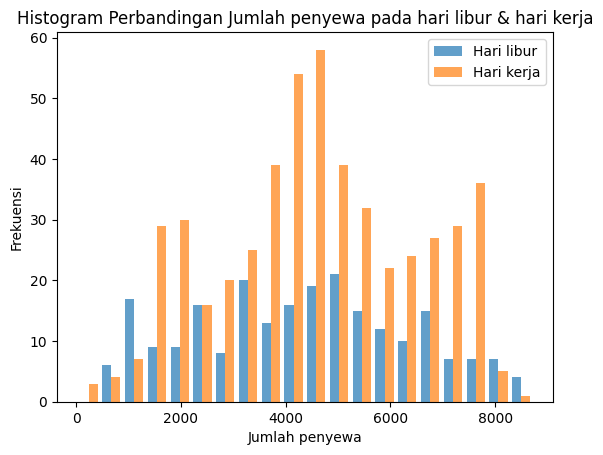

In [26]:
import matplotlib.pyplot as plt

plt.hist([day_df[day_df['workingday'] == 0]['cnt'],
          day_df[day_df['workingday'] == 1]['cnt']],
         bins=20, alpha=0.7, label=['Hari libur', 'Hari kerja'])

# Menambahkan label dan judul
plt.xlabel('Jumlah penyewa')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan Jumlah penyewa pada hari libur & hari kerja')
plt.legend()

# Menampilkan histogram
plt.show()


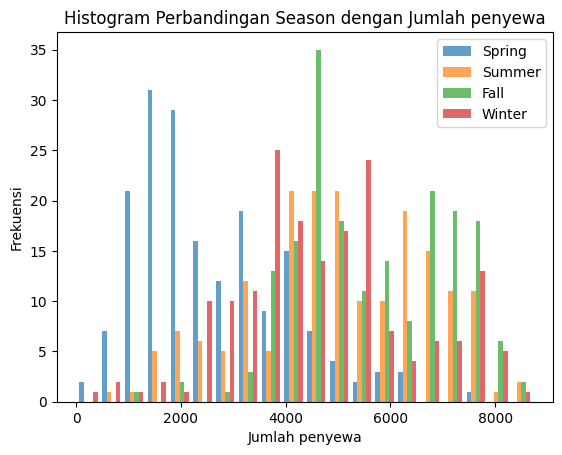

In [27]:
import matplotlib.pyplot as plt

plt.hist([day_df[day_df['season'] == 1]['cnt'],
          day_df[day_df['season'] == 2]['cnt'],
          day_df[day_df['season'] == 3]['cnt'],
          day_df[day_df['season'] == 4]['cnt']],
         bins=20, alpha=0.7, label=['Spring', 'Summer', 'Fall', 'Winter'])

plt.xlabel('Jumlah penyewa')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan Season dengan Jumlah penyewa')
plt.legend()

plt.show()


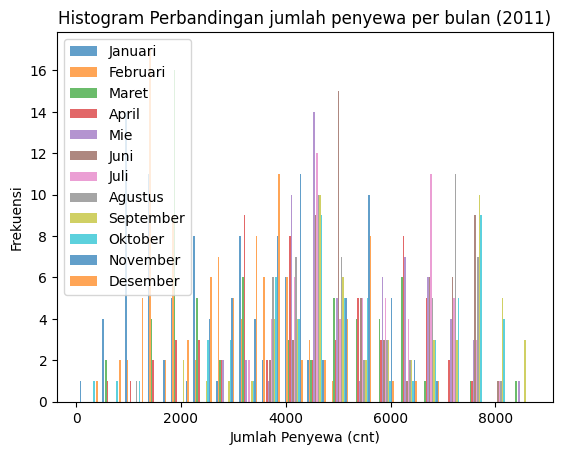

In [65]:
plt.hist([day_df[day_df['mnth'] == 1]['cnt'],
          day_df[day_df['mnth'] == 2]['cnt'],
          day_df[day_df['mnth'] == 3]['cnt'],
          day_df[day_df['mnth'] == 4]['cnt'],
          day_df[day_df['mnth'] == 5]['cnt'],
          day_df[day_df['mnth'] == 6]['cnt'],
          day_df[day_df['mnth'] == 7]['cnt'],
          day_df[day_df['mnth'] == 8]['cnt'],
          day_df[day_df['mnth'] == 9]['cnt'],
          day_df[day_df['mnth'] == 10]['cnt'],
          day_df[day_df['mnth'] == 11]['cnt'],
          day_df[day_df['mnth'] == 12]['cnt']],
         bins=20, alpha=0.7, label=['Januari', 'Februari', 'Maret', 'April', 'Mie', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])

# Menambahkan label dan judul
plt.xlabel('Jumlah Penyewa (cnt)')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan jumlah penyewa per bulan (2011)')
plt.legend()

# Menampilkan histogram
plt.show()


## Visualization & Explanatory Analysis

### Bagaimana performa persewaan bike sharing pada hari kerja dan hari libur?

In [69]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,2012-03-16,1,1,3,0,5,1,2,0.435833,0.436229,0.842083,0.113192,548,3830,4378
584,585,2012-08-07,3,1,8,0,2,1,2,0.735833,0.697621,0.703750,0.116908,1278,5995,7273
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455
649,650,2012-10-11,4,1,10,0,4,1,1,0.435000,0.431167,0.463333,0.181596,834,6736,7570
661,662,2012-10-23,4,1,10,0,2,1,1,0.544167,0.530304,0.641667,0.094546,841,6625,7466


In [70]:
jumlah_penyewa_workingday = day_df.groupby("workingday")["cnt"].sum()
print("Jumlah penyewa hari kerja dan hari libur:", jumlah_penyewa_workingday)


Jumlah penyewa hari kerja dan hari libur: workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


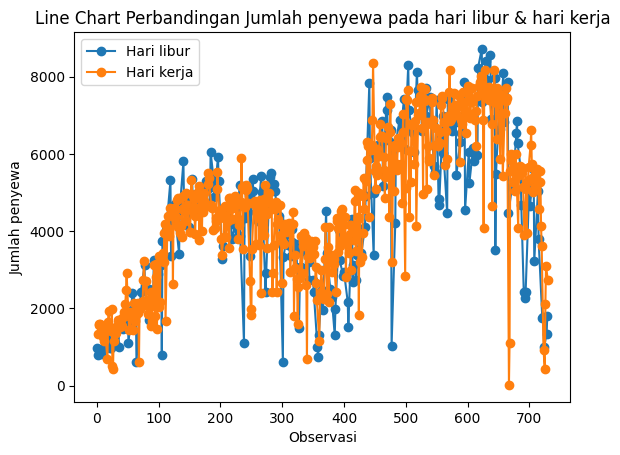

In [72]:

plt.plot(day_df[day_df['workingday'] == 0]['cnt'], label='Hari libur', marker='o')
plt.plot(day_df[day_df['workingday'] == 1]['cnt'], label='Hari kerja', marker='o')

plt.xlabel('Observasi')
plt.ylabel('Jumlah penyewa')
plt.title('Line Chart Perbandingan Jumlah penyewa pada hari libur & hari kerja')
plt.legend()

plt.show()


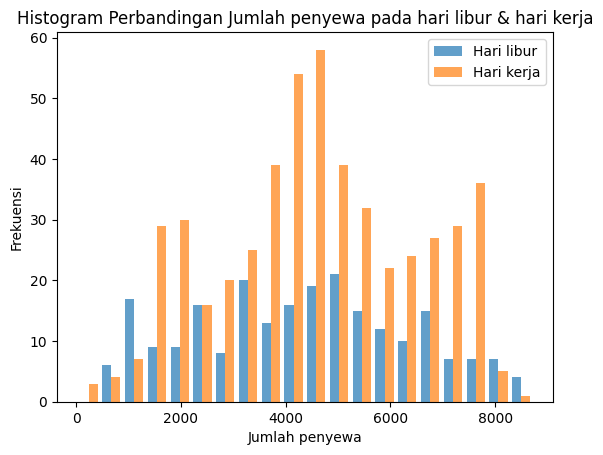

In [71]:
plt.hist([day_df[day_df['workingday'] == 0]['cnt'],
          day_df[day_df['workingday'] == 1]['cnt']],
         bins=20, alpha=0.7, label=['Hari libur', 'Hari kerja'])

# Menambahkan label dan judul
plt.xlabel('Jumlah penyewa')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan Jumlah penyewa pada hari libur & hari kerja')
plt.legend()

# Menampilkan histogram
plt.show()

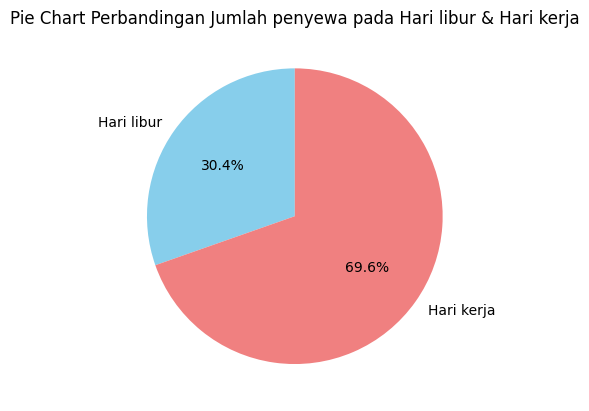

In [74]:
jumlah_penyewa_hari_libur = day_df[day_df['workingday'] == 0]['cnt'].sum()
jumlah_penyewa_hari_kerja = day_df[day_df['workingday'] == 1]['cnt'].sum()

data = [jumlah_penyewa_hari_libur, jumlah_penyewa_hari_kerja]
labels = ['Hari libur', 'Hari kerja']

# Membuat pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart Perbandingan Jumlah penyewa pada Hari libur & Hari kerja')

plt.show()


### Bagaimana performa persewaan bike sharing tiap bulannya pada tahun 2011?

In [75]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [76]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [77]:
statistik_per_bulan = day_df.groupby("mnth")["cnt"].agg(["mean", "min", "max"])
print(statistik_per_bulan)

             mean   min   max
mnth                         
1     2176.338710   431  4521
2     2655.298246  1005  5062
3     3692.258065   605  8362
4     4484.900000   795  7460
5     5349.774194  2633  8294
6     5772.366667  3767  8120
7     5563.677419  3285  8173
8     5664.419355  1115  7865
9     5766.516667  1842  8714
10    5199.225806    22  8156
11    4247.183333  1495  6852
12    3403.806452   441  6606


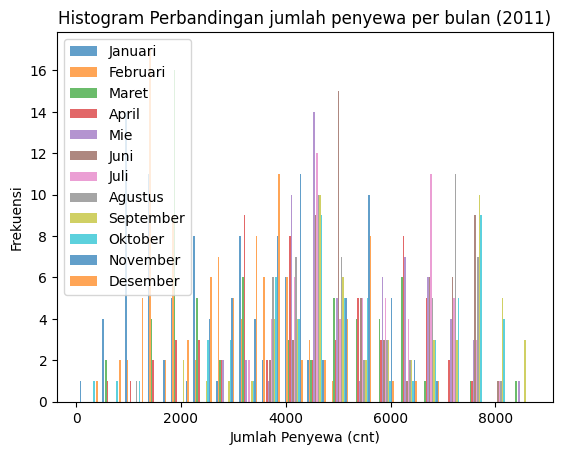

In [78]:
plt.hist([day_df[day_df['mnth'] == 1]['cnt'],
          day_df[day_df['mnth'] == 2]['cnt'],
          day_df[day_df['mnth'] == 3]['cnt'],
          day_df[day_df['mnth'] == 4]['cnt'],
          day_df[day_df['mnth'] == 5]['cnt'],
          day_df[day_df['mnth'] == 6]['cnt'],
          day_df[day_df['mnth'] == 7]['cnt'],
          day_df[day_df['mnth'] == 8]['cnt'],
          day_df[day_df['mnth'] == 9]['cnt'],
          day_df[day_df['mnth'] == 10]['cnt'],
          day_df[day_df['mnth'] == 11]['cnt'],
          day_df[day_df['mnth'] == 12]['cnt']],
         bins=20, alpha=0.7, label=['Januari', 'Februari', 'Maret', 'April', 'Mie', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])

# Menambahkan label dan judul
plt.xlabel('Jumlah Penyewa (cnt)')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan jumlah penyewa per bulan (2011)')
plt.legend()

# Menampilkan histogram
plt.show()

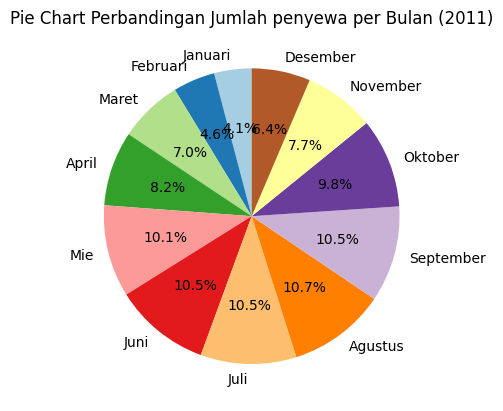

In [79]:
jumlah_penyewa_per_bulan = day_df.groupby("mnth")["cnt"].sum()

data = jumlah_penyewa_per_bulan.values
labels = ['Januari', 'Februari', 'Maret', 'April', 'Mie', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Membuat pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Pie Chart Perbandingan Jumlah penyewa per Bulan (2011)')

plt.show()


### Apakah musim mempengaruhi minat pelanggan dalam menyewa bike sharing?

In [81]:
selected_columns = day_df[['cnt', 'season']]

print(selected_columns.head(12))


     cnt  season
0    985       1
1    801       1
2   1349       1
3   1562       1
4   1600       1
5   1606       1
6   1510       1
7    959       1
8    822       1
9   1321       1
10  1263       1
11  1162       1


In [83]:
jumlah_penyewa_per_musim = day_df.groupby('season')['cnt'].sum().reset_index()

print("Jumlah penyewa tiap musim:", jumlah_penyewa_per_musim)


Jumlah penyewa tiap musim:    season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


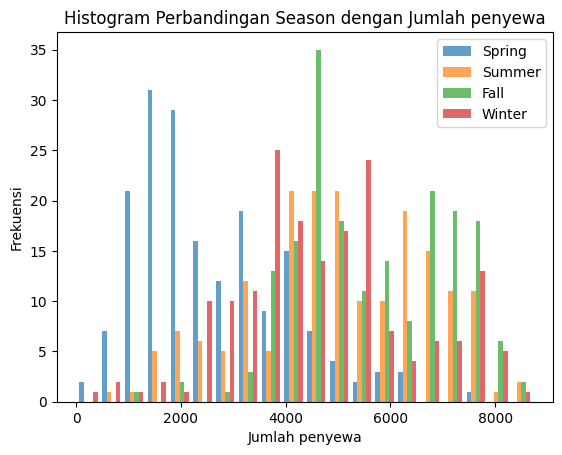

In [84]:
plt.hist([day_df[day_df['season'] == 1]['cnt'],
          day_df[day_df['season'] == 2]['cnt'],
          day_df[day_df['season'] == 3]['cnt'],
          day_df[day_df['season'] == 4]['cnt']],
         bins=20, alpha=0.7, label=['Spring', 'Summer', 'Fall', 'Winter'])

plt.xlabel('Jumlah penyewa')
plt.ylabel('Frekuensi')
plt.title('Histogram Perbandingan Season dengan Jumlah penyewa')
plt.legend()

plt.show()

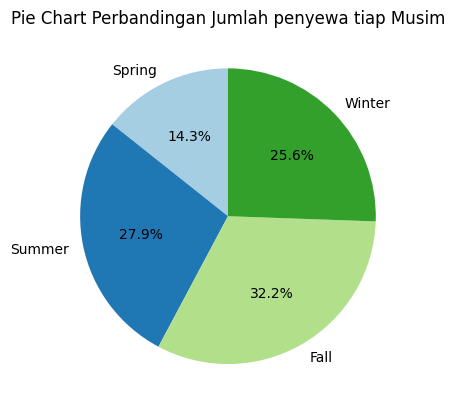

In [85]:
import matplotlib.pyplot as plt

jumlah_penyewa_per_musim = day_df.groupby('season')['cnt'].sum()

data = jumlah_penyewa_per_musim.values
labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pie Chart Perbandingan Jumlah penyewa tiap Musim')

plt.show()


In [1]:
# Menghitung korelasi Pearson
korelasi_pearson = day_df['season'].corr(day_df['cnt'])

# Menghitung korelasi Spearman
korelasi_spearman = day_df['season'].corr(day_df['cnt'], method='spearman')

print(f"Korelasi Pearson: {korelasi_pearson}")
print(f"Korelasi Spearman: {korelasi_spearman}")


NameError: name 'day_df' is not defined

## Conclusion

### Bagaimana performa persewaan bike sharing pada hari kerja dan hari libur?


##### Berdasarkan hasil analisis data, pada hari kerja lebih banyak pelanggan yang menyewa sepeda dengan presentasi 69.6% dibandingkan dengan pelanggan pada hari libur sebesar 30,4%.

### Bagaimana performa persewaan bike sharing tiap bulannya pada tahun 2011?

##### - Berdasarkan hasil analisis data dengan total seluruh pelanggan, baik yg terdaftar maupun tidak. Persewaan sepeda 'Bike Sharing' memiliki pelanggan terbanyak pada bulan Agustus dengan 10.7% dibandingkan dengan 11 bulan lainnya. 
##### -Pelanggan paling sedikit, yaitu pada bulan Januari dengan 4.1%.
##### -Persewaan mengalami kenaikan pesat pada bulan maret dengan kenaikan sebesar 2.4%.
##### -Performa persewaan sepeda dinilai stabil pada angka 10.1% - 10.7% pada bulan Mei-September.
##### -Penurunan performa dengan pesat pada bulan November dengan menurun 2.2%



### Apakah musim mempengaruhi minat pelanggan dalam menyewa Bike Sharing?

##### -Berdasarkan hasil analisis data, perhitungan korelasi antara season dan total pelanggan menggunakan korelasi Pearson sebesar 0.41 dan korelasi Spearman sebesar 0.39. Hal tersebut menunujukkan adanya korelasi positif, dimana jika terjadi perubahan musim, maka jumlah pelanggan pun akan mengalami kenaikan atau penurunan.
##### -Berdasarkan pie chart, pelanggan terbanyak pada fall season atau musim gugur dengan 32.2% dibandingkan dengan spring (14.3%), summer (27.9%), dan winter (25.6%)
